##PRACTICA 1

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=996c445ed04a55e46c2dcd2bb7b3ecf9203a65e9f0a6d04021646622d9964e64
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


Generar un dataset que sea reproducible:

Estructura
El dataset Titanic representa diferentes características de los pasajeros.

*   PassengerId: Identificador único para cada pasajero.
*   Survived: Indica si el pasajero sobrevivió o no.
      0: No sobrevivió.    
      1: Sobrevivió.
*   Pclass: La clase en la que viajaba el pasajero (nivel socioeconómico).
      1: Primera clase.
      2: Segunda clase.
      3: Tercera clase.
*   Name: El nombre del pasajero.
*   Sex: El género del pasajero (male = hombre, female = mujer)
*   Age: La edad del pasajero. Algunos valores pueden estar faltantes.
*   SibSp: Número de hermanos/as o esposos/as que viajaban con el pasajero.
*   Parch: Número de padres o hijos que viajaban con el pasajero.
*   Ticket: Número del billete del pasajero.
*   Fare: La tarifa que pagó el pasajero por su billete.
*   Cabin: El número de cabina del pasajero.
*   Embarked: El puerto de embarque del pasajero.
      C: Cherburgo.
      Q: Queenstown.
      S: Southampton.

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset Titanic desde un CSV alojado en GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Ajustar el estilo de los gráficos
plt.style.use('seaborn-darkgrid')
sns.set_palette("Set2")

# Mostrar las primeras filas
titanic_df.head()

<ipython-input-3-9793eb862418>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# GRAFICO DE BARRAS

Un gráfico de barras permite la representación visual de datos mediante barras rectangulares. Su objetivo principal es comparar magnitudes entre diferentes categorías de una variable, es útil para mostrar las diferencias en tamaño, frecuencia o cantidad entre diferentes categorías.


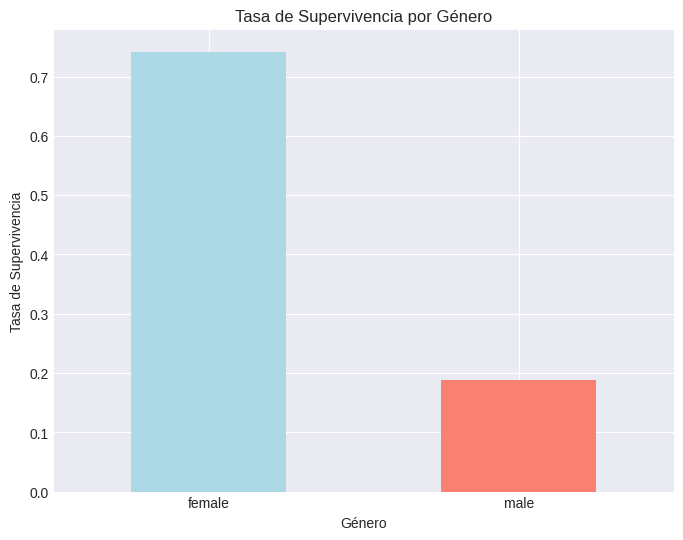

In [4]:
# Gráfico de Barras: Verticales (BAR)

plt.figure(figsize=(8, 6))
titanic_df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Tasa de Supervivencia por Género')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.show()


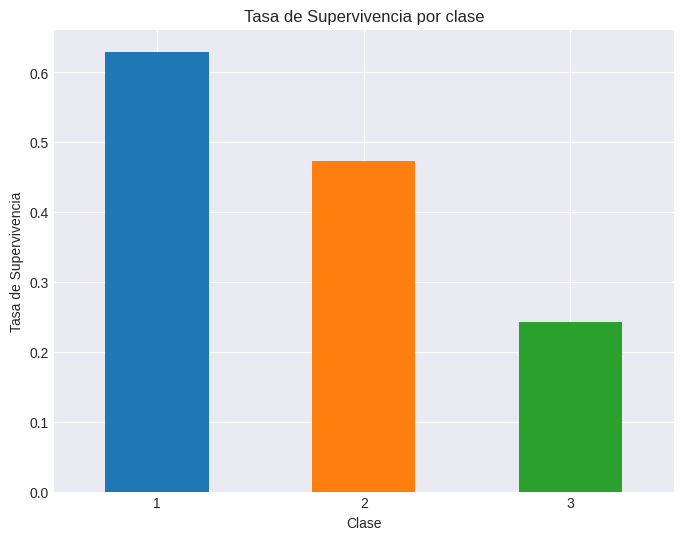

In [5]:
plt.figure(figsize=(8, 6))
titanic_df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Tasa de Supervivencia por clase')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Clase')
plt.xticks(rotation=0)
plt.show()


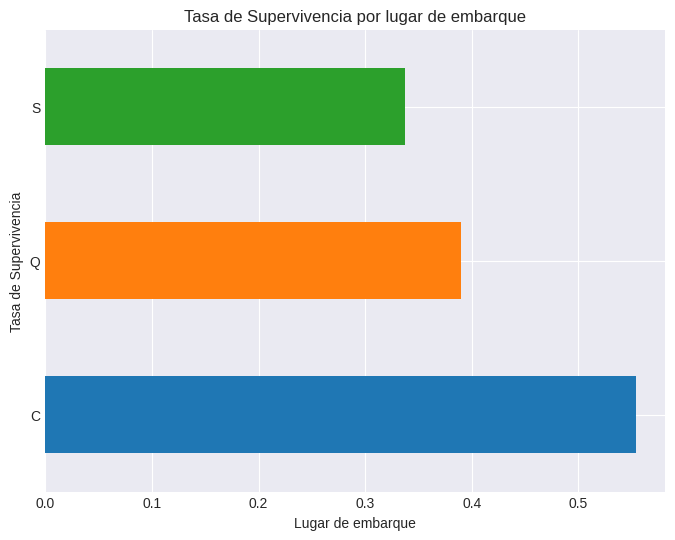

In [6]:
# Grafico de barras: Horizontales(BARH)

plt.figure(figsize=(8, 6))
titanic_df.groupby('Embarked')['Survived'].mean().plot(kind='barh', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Tasa de Supervivencia por lugar de embarque')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Lugar de embarque')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x700 with 0 Axes>

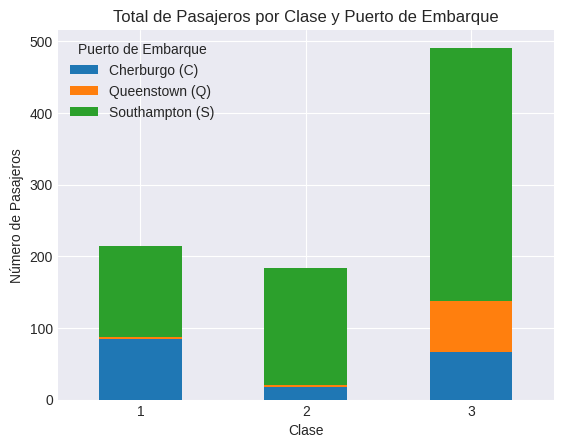

In [7]:
# Gráfico de Barras: Apiladas

total_por_clase_embarque = titanic_df.groupby(['Pclass', 'Embarked']).size().unstack()

plt.figure(figsize=(10, 7))
total_por_clase_embarque.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Total de Pasajeros por Clase y Puerto de Embarque')
plt.ylabel('Número de Pasajeros')
plt.xlabel('Clase')
plt.xticks(rotation=0)
plt.legend(title='Puerto de Embarque', labels=['Cherburgo (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()

# GRAFICO DE CAJAS
Permite comparar la distribución de un conjunto de datos entre diferentes grupos o categorías. Proporciona una visualización clara de la dispersión y la variabilidad de los datos en un solo gráfico.

Un box plot es una representación gráfica que permite resumir y visualizar la distribución de un conjunto de datos a través de sus cuartiles. Este tipo de gráfico es especialmente útil para identificar la dispersión, la asimetría y la presencia de valores atípicos en los datos.

Componentes de un gráfico de cajas:
*   Caja: Se extiende desde el primer cuartil (linea inferior) hasta el tercer cuartil (linea superior)
La línea dentro de la caja representa la mediana (Q2) de los datos, que divide el conjunto de datos en dos mitades.

*   Bigotes: Se extienden desde los extremos de la caja hasta los valores mínimos y máximos que no son considerados valores atípicos.


*   Valores atípicos: Se representan como puntos individuales y pueden indicar variaciones o errores en los datos.


Ayuda a identificar si los datos están distribuidos de manera simétrica o si están sesgados. Ejemplo:

*   Sesgo a la Izquierda (o Sesgo Negativo):
    La mediana se encuentra más cerca del borde superior de la caja.
    Los bigotes o los valores atípicos pueden extenderse más hacia la izquierda.

*   Sesgo a la Derecha (o Sesgo Positivo):
    La mediana se encuentra más cerca del borde inferior de la caja.
    Los bigotes o los valores atípicos pueden extenderse más hacia la derecha.




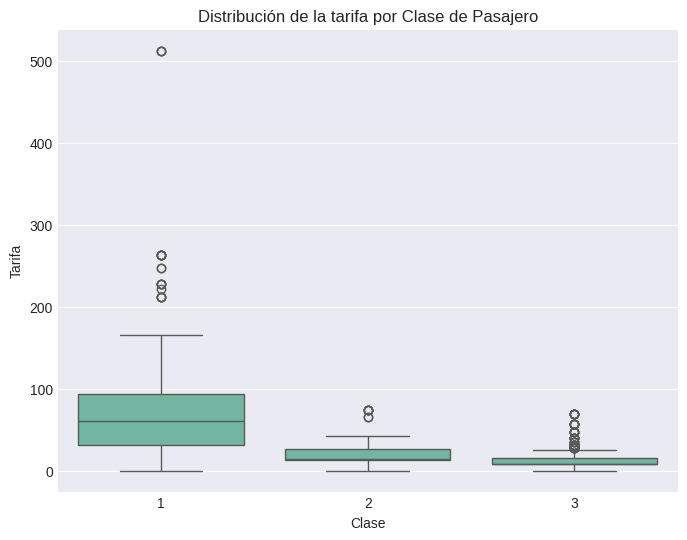

In [8]:
# Gráfico de Cajas (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Distribución de la tarifa por Clase de Pasajero')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.show()

Un gráfico de cajas que muestra una mediana baja pero muchos valores atípicos superiores indica una distribución sesgada, y resalta la importancia de considerar tanto la mediana como la media al interpretar los datos.

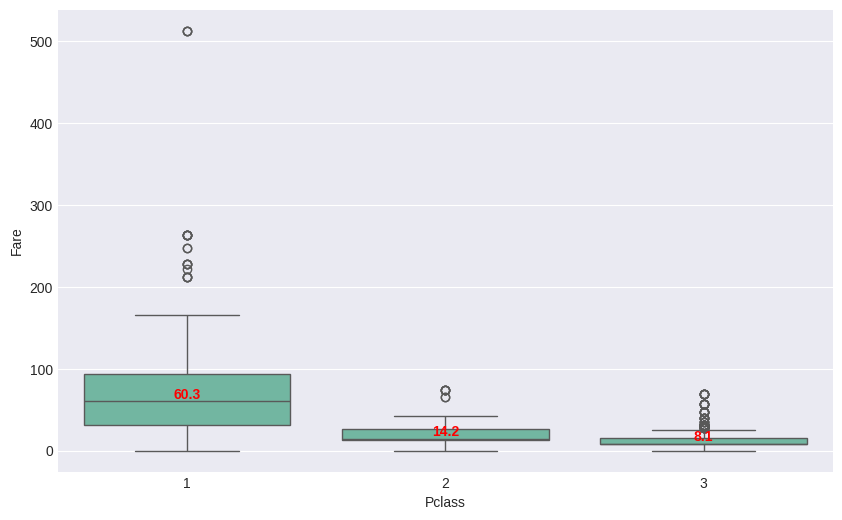

In [9]:
# Calcular la mediana de la tarifa por clase
mediana_tarifa = titanic_df.groupby('Pclass')['Fare'].median().reset_index()

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Pclass', y='Fare', data=titanic_df)

# Añadir la mediana como un punto en el gráfico
for index, row in mediana_tarifa.iterrows():
    plt.text(row['Pclass'] - 1, row['Fare'], f'{row["Fare"]:.1f}', color='red',
             ha='center', va='bottom', fontweight='bold')


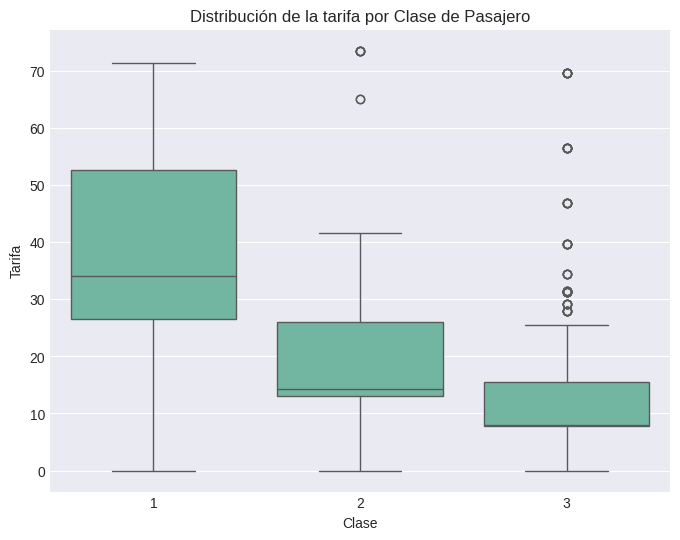

In [10]:
titanic_df2 = titanic_df[titanic_df['Fare'] < 75]
# Gráfico de Cajas (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df2)
plt.title('Distribución de la tarifa por Clase de Pasajero')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.show()

# HISTOGRAMA


Un histograma permite:

*   Análizar la Distribución de Datos: Permite visualizar la forma de la distribución de un conjunto de datos. Puedes identificar si la distribución es normal, sesgada (hacia la derecha o la izquierda), bimodal (con dos picos), o tiene otros patrones.También se puede ver rápidamente en qué rangos de valores se concentra la mayoría de los datos.

*   Identificación de Valores Atípicos: Al observar barras con poca o ninguna frecuencia, puedes identificar rangos donde los datos son inusuales.

Limitaciones:

*   Elección de Bins: La elección del número y el tamaño de los bins puede influir significativamente en la representación visual de los datos. Demasiados bins pueden hacer que el gráfico se vea desordenado, mientras que muy pocos pueden ocultar detalles importantes.


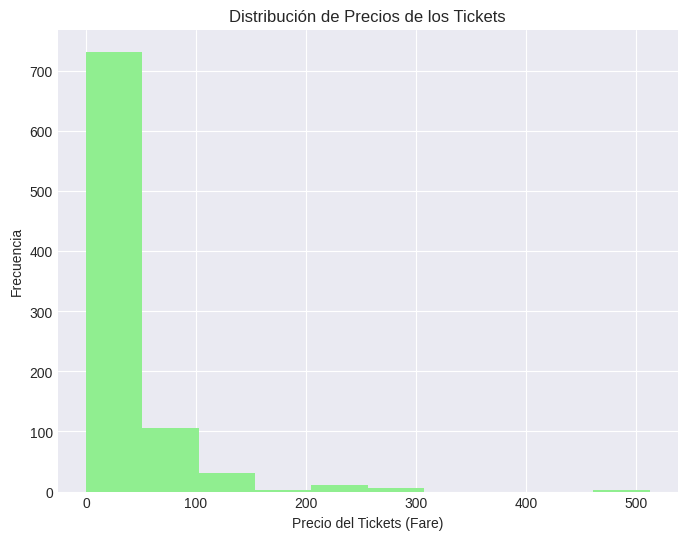

In [13]:
# Histograma

plt.figure(figsize=(8, 6))
titanic_df['Fare'].plot(kind='hist', bins=10, color='lightgreen')
plt.title('Distribución de Precios de los Tickets')
plt.xlabel('Precio del Tickets (Fare)')
plt.ylabel('Frecuencia')
plt.show()

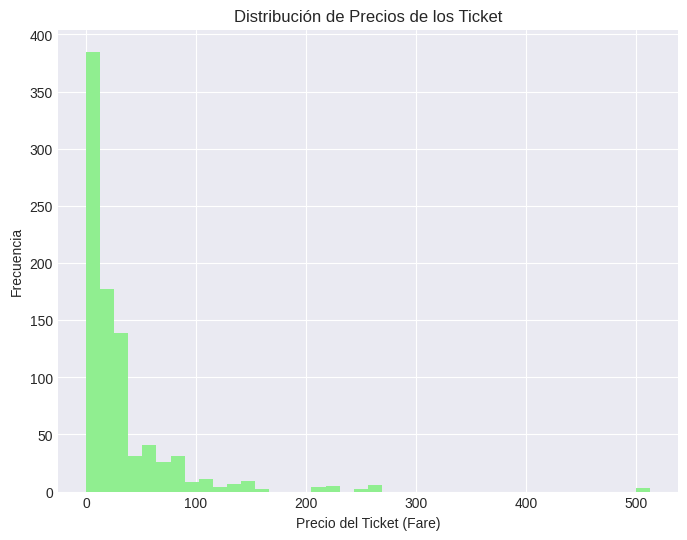

In [14]:
plt.figure(figsize=(8, 6))
titanic_df['Fare'].plot(kind='hist', bins=40, color='lightgreen')
plt.title('Distribución de Precios de los Ticket')
plt.xlabel('Precio del Ticket (Fare)')
plt.ylabel('Frecuencia')
plt.show()

# GRAFICO DE DISPERSIÓN

Un scatter plot es una herramienta visual que se utiliza para representar la relación entre dos variables numéricas. En un gráfico de dispersión, cada punto del gráfico representa un par de valores de las dos variables.

Permite:
*   Identificación de Correlación: Puede indicar si las variables están correlacionadas de manera positiva (cuando una aumenta, la otra también), negativa (cuando una aumenta, la otra disminuye), o si no hay correlación. Si los puntos están cerca de una línea recta, indica una relación más fuerte
*   Patrones: Se puede observar una tendencia lineal, cuadrática o exponencial. Permite identificar agrupaciones de datos o "clusters", lo que puede sugerir la existencia de diferentes grupos dentro de los datos.
*   Valores Atípicos: Podrían representar errores o datos excepcionales que requieren atención especial.

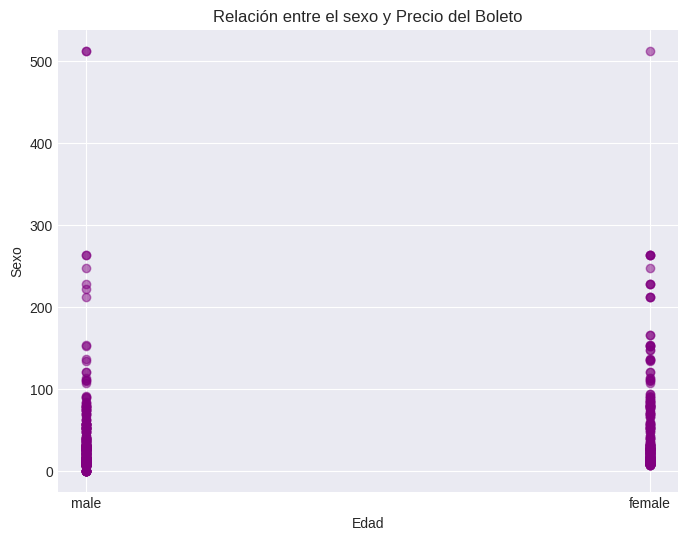

In [11]:
# Gráfico de Dispersión (Scatter Plot)

plt.figure(figsize=(8, 6))
plt.scatter(titanic_df['Sex'], titanic_df['Fare'], alpha=0.5, color='purple')
plt.title('Relación entre el sexo y Precio del Boleto')
plt.xlabel('Edad')
plt.ylabel('Sexo')
plt.show()

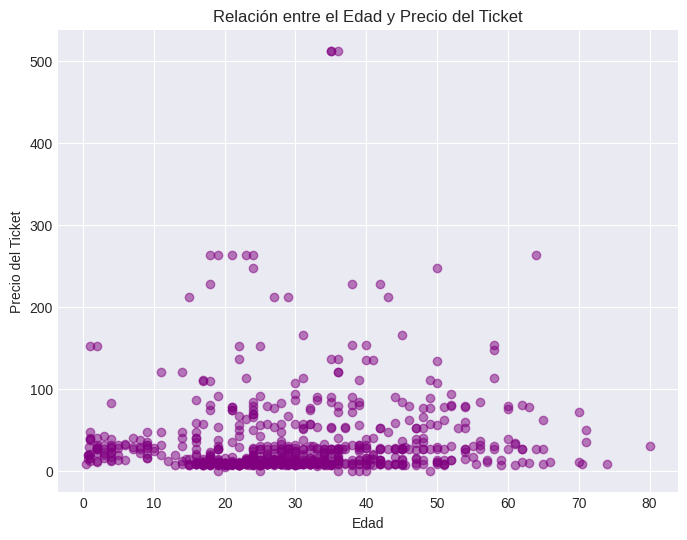

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.5, color='purple')
plt.title('Relación entre el Edad y Precio del Ticket')
plt.xlabel('Edad')
plt.ylabel('Precio del Ticket')
plt.grid(True)
plt.show()



# GRAFICO CIRCULAR

Un gráfico circular permite visualizar cuanto diferentes categorías ocupan en relación con un total. Este tipo de gráfico es ideal cuando quieres mostrar cómo se distribuye un conjunto de datos en partes que suman el 100%.

*   Permite visualizar  y comparar rápidamente cómo se divide un conjunto de datos en partes proporcionales para ver si hay alguna dominante.

*   No permite precision para mostrar relaciones complejas.



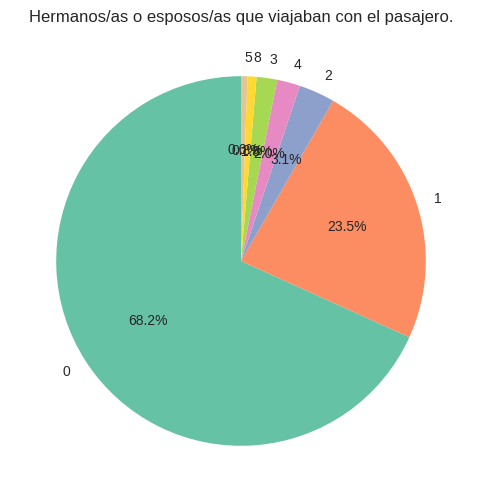

In [15]:
#  Gráfico Circular (Pie Chart)

plt.figure(figsize=(8, 6))
titanic_df['SibSp'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Hermanos/as o esposos/as que viajaban con el pasajero.')
plt.ylabel('')  # Ocultar el título del eje y
plt.show()

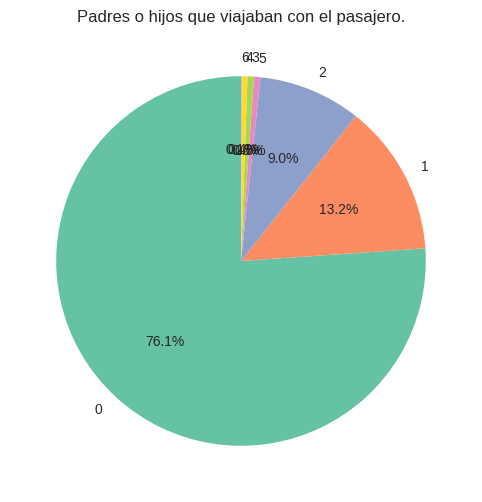

In [16]:
#  Gráfico Circular (Pie Chart)

plt.figure(figsize=(8, 6))
titanic_df['Parch'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Padres o hijos que viajaban con el pasajero.')
plt.ylabel('')  # Ocultar el título del eje y
plt.show()

# GRAFICO DE VIOLIN

Combina características de un gráfico de caja (boxplot) y un histograma de densidad para mostrar la distribución de datos de una manera más detallada. Es especialmente útil para visualizar no solo las estadísticas resumidas, como los cuartiles y la mediana, sino también la distribución de la densidad de los datos.

Interpretación:

*   Si la densidad de los datos es alta en algún punto, la parte del gráfico será más ancha, mientras que en áreas donde la densidad es baja, será más estrecha (similar al histograma).
*   Puedes ver la mediana y los cuartiles, pero el gráfico de violín también muestra cómo se distribuyen los datos dentro de cada grupo.
*   Permite identificar si la distribución de los datos tiene más de una moda (picos), algo que no es tan evidente en un boxplot.

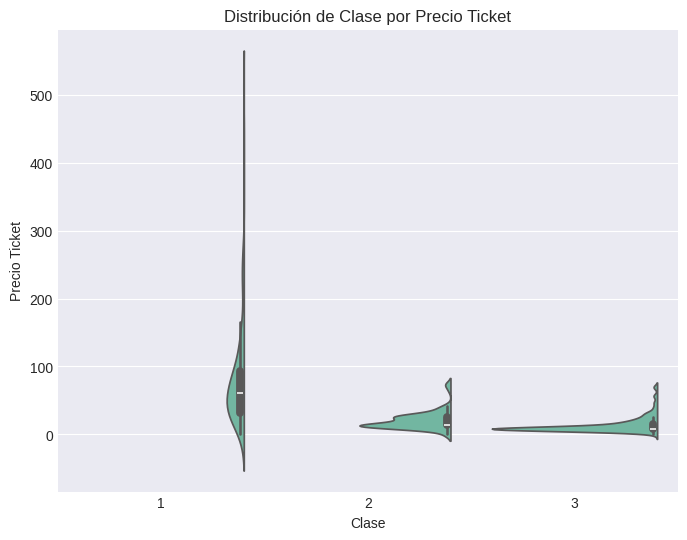

In [17]:
# Gráfico de Violín:

plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Fare', data=titanic_df, split=True)
plt.title('Distribución de Clase por Precio Ticket')
plt.xlabel('Clase')
plt.ylabel('Precio Ticket')
plt.show()

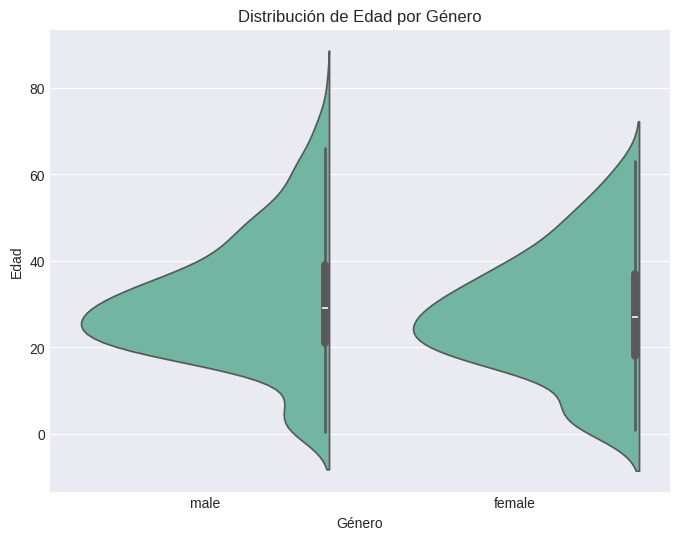

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Age', data=titanic_df, split=True)
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

# GRAFICO DE LINEAS

Los gráficos de líneas permiten mostrar cómo cambia una variable a lo largo del tiempo, como ejemplo: el precio de una acción, las temperaturas diarias, o el crecimiento de ventas. Aunque su uso común es mostrar el tiempo en el eje X, también puede utilizarse para comparar dos series de datos relacionadas.

*   Eje X: Generalmente representa la variable independiente, que a menudo es el tiempo.
*   Eje Y: Representa la variable dependiente, como precios, valores de medición, o cantidades.

Facilita la identificación de tendencias, como si los datos están en crecimiento, en declive, o si hay patrones cíclicos. También permite identificar anomalías o cambios drásticos en el tiempo.

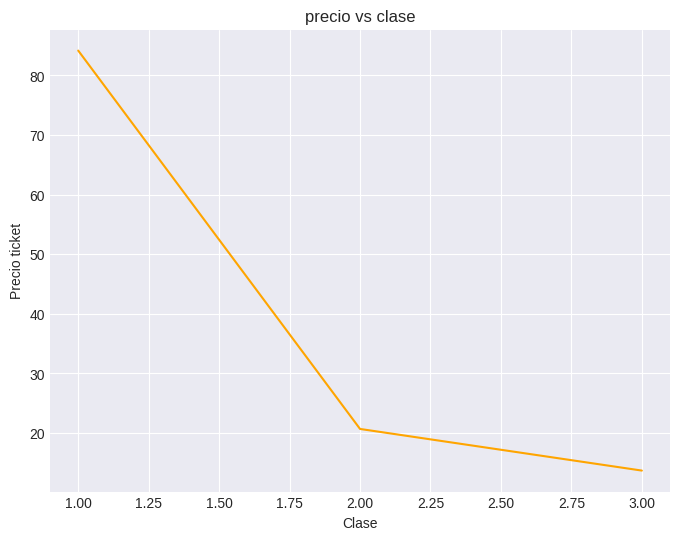

In [32]:
# Gráfico de Líneas

plt.figure(figsize=(8, 6))
titanic_df.groupby('Pclass')['Fare'].mean().plot(kind='line', color='orange')
plt.title('precio vs clase')
plt.xlabel('Clase')
plt.ylabel('Precio ticket')
plt.show()

# GRAFICO DE DENSIDAD

<ipython-input-20-af723acd3392>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'].dropna(), shade=True, color="green", label="Sobrevivió")
<ipython-input-20-af723acd3392>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df[titanic_df['Survived'] == 0]['Age'].dropna(), shade=True, color="red", label="No Sobrevivió")


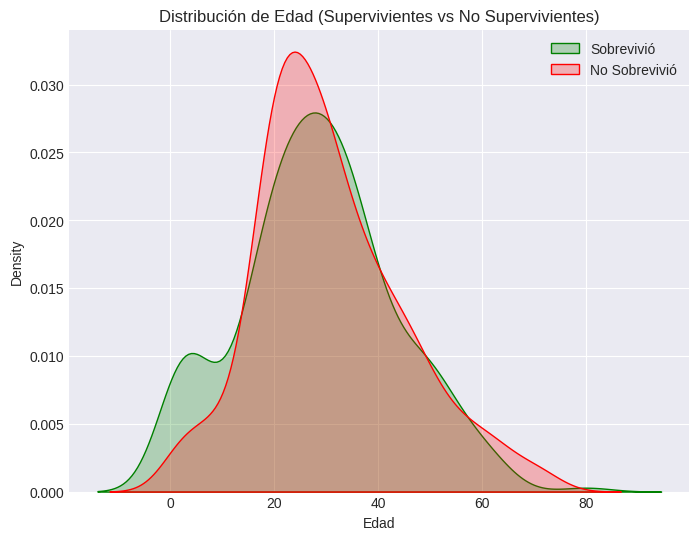

In [20]:
# Gráfico de densidad (KDE)
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'].dropna(), shade=True, color="green", label="Sobrevivió")
sns.kdeplot(titanic_df[titanic_df['Survived'] == 0]['Age'].dropna(), shade=True, color="red", label="No Sobrevivió")
plt.title('Distribución de Edad (Supervivientes vs No Supervivientes)')
plt.xlabel('Edad')
plt.legend()
plt.show()

<ipython-input-34-252d0d9b0084>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df[titanic_df['Sex'] == "female"]['Age'].dropna(), shade=True, color="green", label="Mujer")
<ipython-input-34-252d0d9b0084>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic_df[titanic_df['Sex'] == "male"]['Age'].dropna(), shade=True, color="red", label="Hombre")


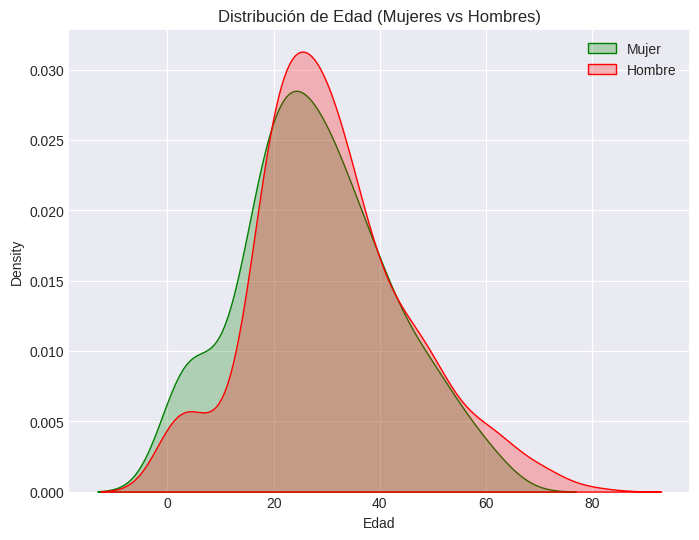

In [34]:
# Gráfico de densidad (KDE)
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic_df[titanic_df['Sex'] == "female"]['Age'].dropna(), shade=True, color="green", label="Mujer")
sns.kdeplot(titanic_df[titanic_df['Sex'] == "male"]['Age'].dropna(), shade=True, color="red", label="Hombre")
plt.title('Distribución de Edad (Mujeres vs Hombres)')
plt.xlabel('Edad')
plt.legend()
plt.show()

# PAIR PLOT

Es una herramienta de visualización que se utiliza para explorar relaciones entre múltiples variables en un dataset. El pairplot genera una matriz de gráficos, en donde:


*   En la diagonal principal: Muestra la distribución de cada variable de forma individual. Esto puede ser un histograma o un gráfico de densidad.
*   Fuera de la diagonal: Muestra gráficos de dispersión (scatter plots) entre pares de variables, lo que te permite observar cómo se relacionan dos variables específicas.
*   No se pueden utilizar cualquier tipo de variable



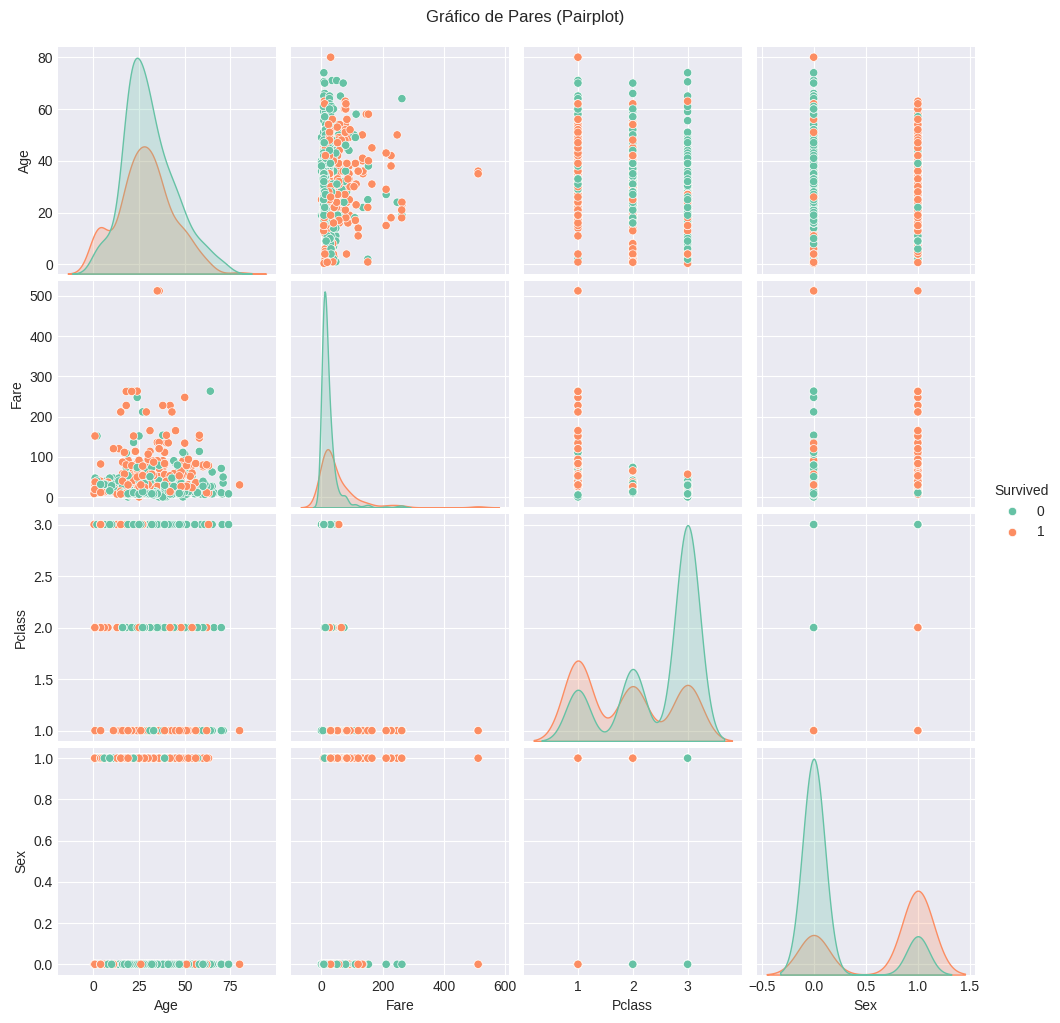

In [38]:
# Se modifica la columna 'Sex' a formato numérico
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
sns.pairplot(titanic_df[['Age', 'Fare', 'Pclass', 'Survived', 'Sex']].dropna(), hue='Survived', palette="Set2")
plt.suptitle('Gráfico de Pares (Pairplot)', y=1.02)
plt.show()


# KDEPLOT

Permite visualizar la distribución de datos: Permite observar la forma y la distribución de los datos de manera continua, lo que ayuda a entender mejor cómo se distribuyen los valores.
Facilita la detección de picos en la distribución, lo que puede indicar la existencia de subgrupos dentro de los datos.


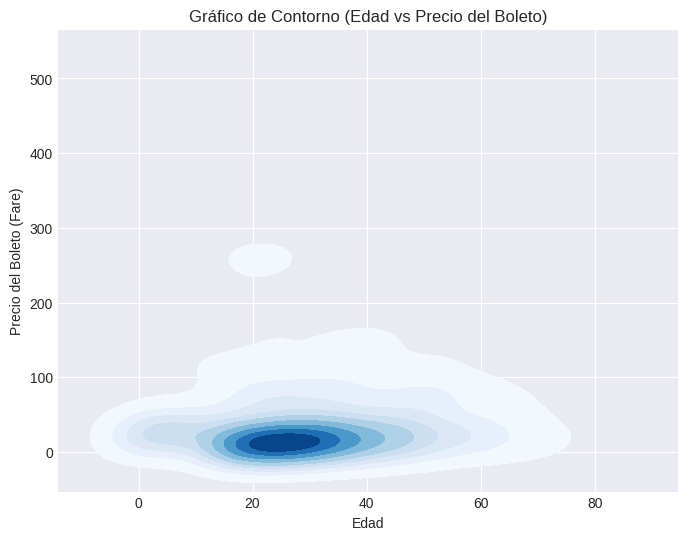

In [39]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=titanic_df['Age'], y=titanic_df['Fare'], fill=True, cmap="Blues", levels=10)
plt.title('Gráfico de Contorno (Edad vs Precio del Boleto)')
plt.xlabel('Edad')
plt.ylabel('Precio del Boleto (Fare)')
plt.show()

# SWARMPLOT

Permite mostrar la distribución de datos categóricos evitando la superposición de puntos. Los puntos de datos aparecena lo largo del eje de la categoría, de modo que se distribuyen y se presentan claramente sin solaparse.

Adecuado para datos pequeños a moderados: Funciona mejor con conjuntos de datos que no son demasiado grandes, ya que demasiados puntos pueden hacer que la visualización sea confusa.

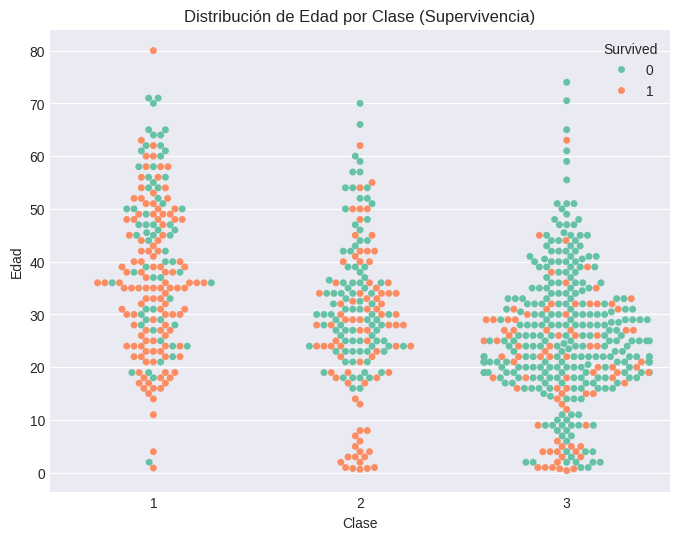

In [41]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Pclass', y='Age', data=titanic_df, hue='Survived', palette="Set2")
plt.title('Distribución de Edad por Clase (Supervivencia)')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

# STRIPPLOT

Muestra la distribución de una variable cuantitativa a lo largo de una variable categórica. Representa datos a través de puntos dispersos (o "strips") que se dibujan en línea recta. Cada punto representa una observación individual, lo que permite ver la distribución de los datos.
Variabl



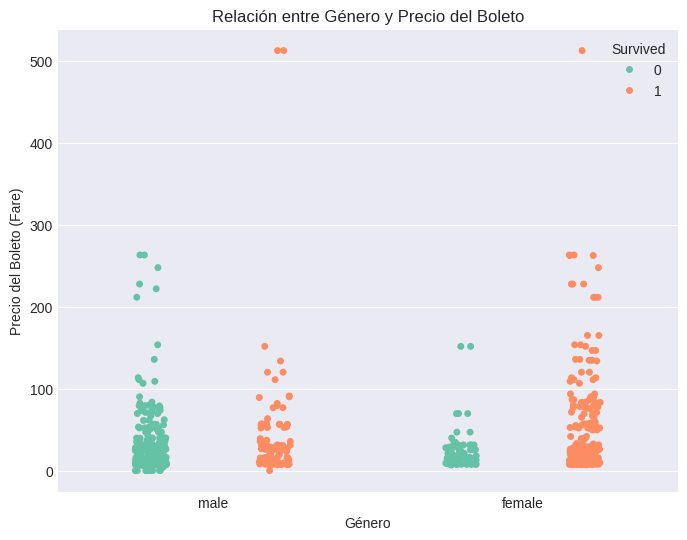

In [24]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Sex', y='Fare', data=titanic_df, jitter=True, hue='Survived', palette='Set2', dodge=True)
plt.title('Relación entre Género y Precio del Boleto')
plt.xlabel('Género')
plt.ylabel('Precio del Boleto (Fare)')
plt.show()

# JOINTPLOT

Permite generar gráficos que muestran la relación entre dos variables, combinando diferentes tipos de gráficos (como diagramas de dispersión y histogramas) para proporcionar una vista más completa de la relación entre estas variables.

*   Histograma superior: Corresponde a la distribución de la variable del eje X. La altura de las barras indica la cantidad (frecuencia) de puntos de datos que caen dentro de un intervalo o "bin" específico de valores del eje X.

*   Histograma derecho: Corresponde a la distribución de la variable del eje Y.




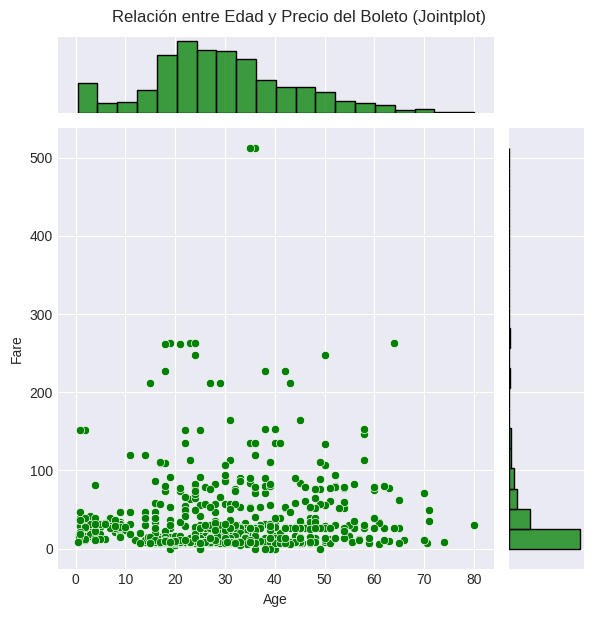

In [26]:
sns.jointplot(x="Age", y="Fare", data=titanic_df, kind="scatter", color="green", marginal_kws=dict(bins=20, fill=True))
plt.suptitle('Relación entre Edad y Precio del Boleto (Jointplot)', y=1.02)
plt.show()